# Projet 3 : Clustering et Analyses

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os as os
import seaborn as sns
from random import sample
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import Imputer
from scipy import stats
from sklearn.mixture import GMM
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn import (manifold, datasets, decomposition,
                     ensemble, discriminant_analysis, random_projection)

%matplotlib inline

plt.style.use('seaborn-notebook')
sns.set_style('ticks')
sns.set(rc={'figure.figsize': (11, 7)})
sns.set(rc={'font.size': 24})
# Paramètre de transparence
alpha = 0.5

os.getcwd()
os.chdir("C:/Users/flemeill/Documents/01 - Projets OC/03 - Projet 3/Main project")

In [3]:
def DistriPlot(Var, X):
    "Fonction permettant d'afficher la distribution statistique d'une variable (courbe + histogramme)"

    sns.distplot(Var)
    plt.xlabel(X, fontsize=18)
    plt.ylabel("Distribution", fontsize=18)
    plt.title("Distribution de " + X, fontsize=24)
    print("La médiane de ", X, "est de ", Var.median())
    print("La moyenne de ", X, "est de ", Var.mean())


def BoxPlot1D(X, title):
    "Fonction permettant d'afficher la distribution statistique d'une variable en boite à moustache"

    sns.boxplot(X)
    plt.title(title, fontsize=24)
    print(X.describe())


def Cluster_Count(labels):
    "Fonction qui permet d'afficher le nombre de cluster et le nombre d'individus par cluster"

    Count = []
    Nb_cluster = labels.max() + 1
    print('Il y a ', Nb_cluster, ' clusters différents')

    Count = np.bincount(labels)
    # barplot
    fig = plt.figure(figsize=(14, 7))
    ax = fig.add_subplot(121)
    sns.barplot(x=np.arange(1, Nb_cluster + 1),
                y=Count, ax=ax, palette='Dark2')
    # pour la couleur on peut pensé à : color=np.arange(Nb_cluster) 
    plt.title('Visualisation du nombre de cluster et de leur volume', fontsize=18)

    # pie chart
    ax = fig.add_subplot(122)
    ax.pie(Count, labels=np.arange(1, Nb_cluster + 1),
           autopct='%1.1f%%')
    plt.title('Répartition du nombre de points au sein des clusters', fontsize=18)

    plt.show()

## Import des différents data set d'analyse

In [13]:
data = pd.read_csv("data2_wr.csv")
print(data.columns)

quant = pd.read_csv("dataquant_wr.csv")
print(quant.columns)

data_std = pd.read_csv("data_std.csv")

Index(['CustomerID', 'frequency', 'monetary_value', 'Mean Quantity',
       'Mean UnitPrice'],
      dtype='object')
Index(['CustomerID', 'f_quartile', 'm_quartile', 'q_quartile', 'pu_quartile'], dtype='object')


#### Séparation des variables explicatives et de 'CustomerID'

In [14]:
# définition de X et y (Pour data)
todrop = ['CustomerID']
X_data = data.drop(columns=todrop)
y_data = data.CustomerID

# définition de X et y (Pour quant)
todrop = ['CustomerID']
X_quant = quant.drop(columns=todrop)
y_quant = quant.CustomerID

# définition de X et y (Pour data_std)
todrop = ['CustomerID']
X_std = quant.drop(columns=todrop)
y_std = quant.CustomerID

## Centrage et réduction des variables

In [15]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X_data)
X_data_sc = scaler.transform(X_data)

scaler2 = preprocessing.StandardScaler()
scaler2.fit(X_quant)
X_quant_sc = scaler2.transform(X_quant)

scaler3 = preprocessing.StandardScaler()
scaler3.fit(X_std)
X_std_sc = scaler2.transform(X_std)

# Analyse et classification du jeu de données normalisé

## Hierarchical clustering

#### Dendrograms

On décide couper les dendrogrammmes à 12 clusters. Un plus grand nombre de cluster deviendrait difficile à analyser dans la suite

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage

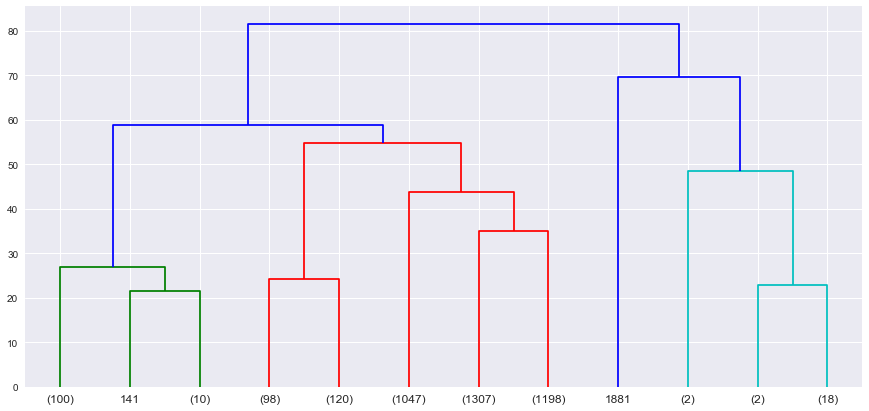

In [8]:
# Méthode de Ward
Link = linkage(X_data_sc, 'ward')
fig = plt.figure(figsize=(15, 7))
dn = dendrogram(Link, p=12, truncate_mode='lastp')

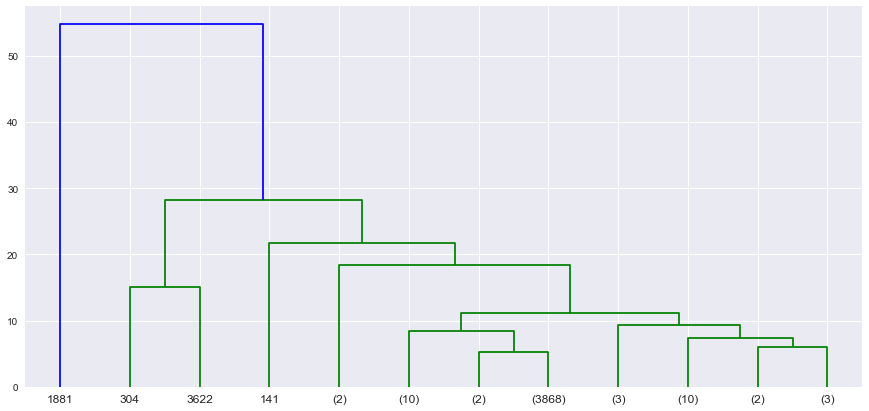

In [9]:
# En utilisant le lien moyen 
Link = linkage(X_data_sc, 'average')
fig = plt.figure(figsize=(15, 7))
dn = dendrogram(Link, p=12, truncate_mode='lastp')

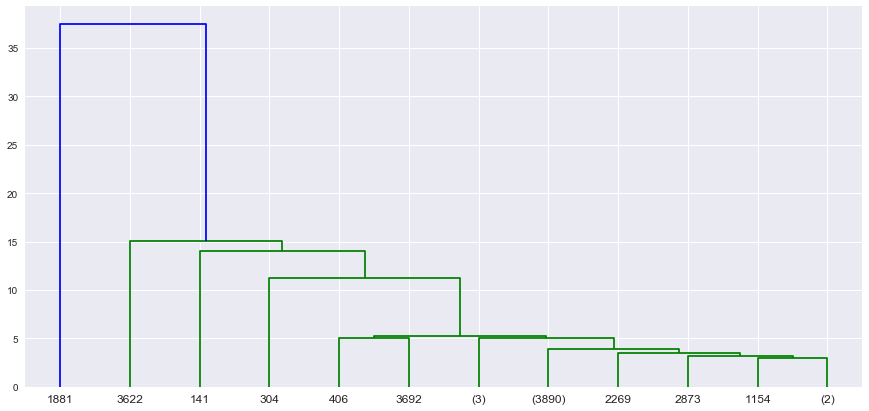

In [10]:
# En utilisant le lien simple
Link = linkage(X_data_sc, 'single')
fig = plt.figure(figsize=(15, 7))
dn = dendrogram(Link, p=12, truncate_mode='lastp')

## Agglomerative clustering

Il y a  5  clusters différents


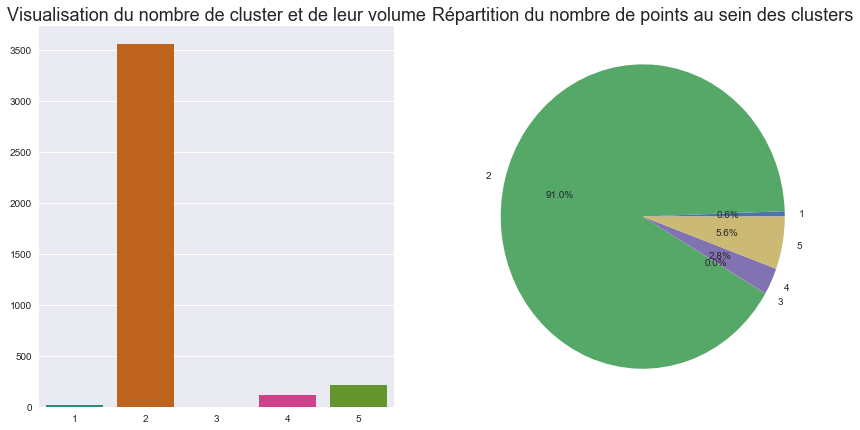

Silhouette Coefficient: 0.570


In [11]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(linkage='ward', n_clusters=5)
model.fit(X_data_sc)
Cluster_Count(model.labels_)
print("Silhouette Coefficient: %0.3f" %
      silhouette_score(X_data_sc, model.labels_))

## K-Means

#### Implémentation de l'algorithme Kmeans pour différentes valeurs de n_clusters, visualisation et analyse des résultats

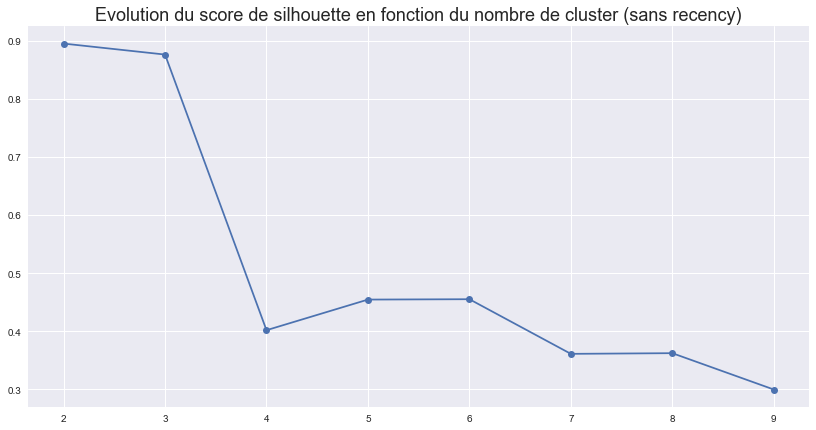

In [12]:
fig = plt.figure(figsize=(14, 7))
silhouette = []
for num_clusters in range(2, 10):
    cls = KMeans(n_clusters=num_clusters)
    cls.fit(X_data_sc)
    silh = silhouette_score(X_data_sc, cls.labels_)
    silhouette.append(silh)

plt.plot(range(2, 10), silhouette, marker='o')

plt.title('Evolution du score de silhouette en fonction du nombre de cluster (sans recency)', fontsize=18)
plt.show()

### Decomposition en 2 composantes principales pour visualisation

In [12]:
from sklearn import decomposition 
pca = decomposition.PCA(n_components=2)
pca.fit(X_data_sc)
print(pca.explained_variance_ratio_.cumsum())
X_trans = pca.transform(X_data_sc)

[0.41343979 0.67603511]


Visualisation des clusters selon les 2 composantes principales obtenues par PCA

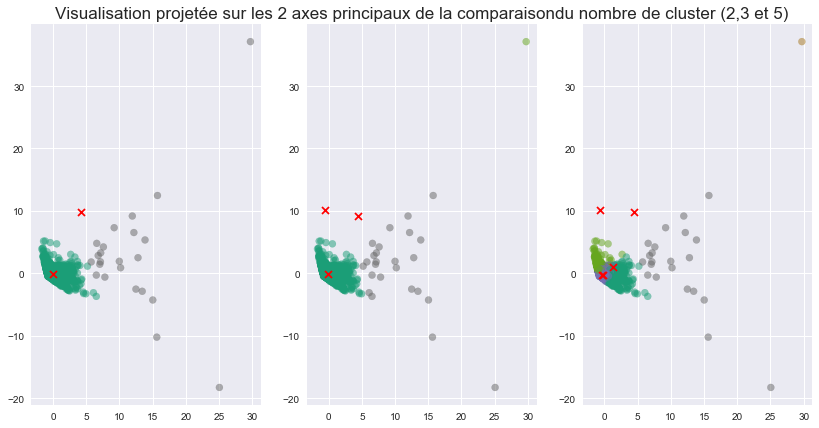

In [53]:
fig = plt.figure(figsize=(14, 7))

cls = KMeans(n_clusters=2)
cls.fit(X_data_sc)
ax = fig.add_subplot(131)
ax.scatter(X_trans[:, 0], X_trans[:, 1],
           c=cls.labels_, cmap="Dark2", alpha=alpha)
ax.scatter(cls.cluster_centers_[:, 0], cls.cluster_centers_[:, 1],
           marker='x', cmap="YlGnBu", c=['r'])

cls3 = KMeans(n_clusters=3)
cls3.fit(X_data_sc)
ax = fig.add_subplot(132)
ax.scatter(X_trans[:, 0], X_trans[:, 1],
           c=cls3.labels_, cmap="Dark2", alpha=alpha)
ax.scatter(cls3.cluster_centers_[:, 0], cls3.cluster_centers_[:, 1],
           marker='x', cmap="YlGnBu", c=['r'])
plt.title('Visualisation projetée sur les 2 axes principaux de la comparaison'
          'du nombre de cluster (2,3 et 5)', fontsize=17)

cls5 = KMeans(n_clusters=5)
cls5.fit(X_data_sc)
ax = fig.add_subplot(133)
ax.scatter(X_trans[:, 0], X_trans[:, 1],
           c=cls5.labels_, cmap="Dark2", alpha=alpha)
ax.scatter(cls5.cluster_centers_[:, 0], cls5.cluster_centers_[:, 1],
           marker='x', cmap="YlGnBu",  c=['r'])

plt.show()

Analyse pour 2 clusters

[-0.0248753  -0.05863259 -0.03431614 -0.00239728]
[4.19743614 9.89361227 5.7904749  0.40451425]
Il y a  2  clusters différents


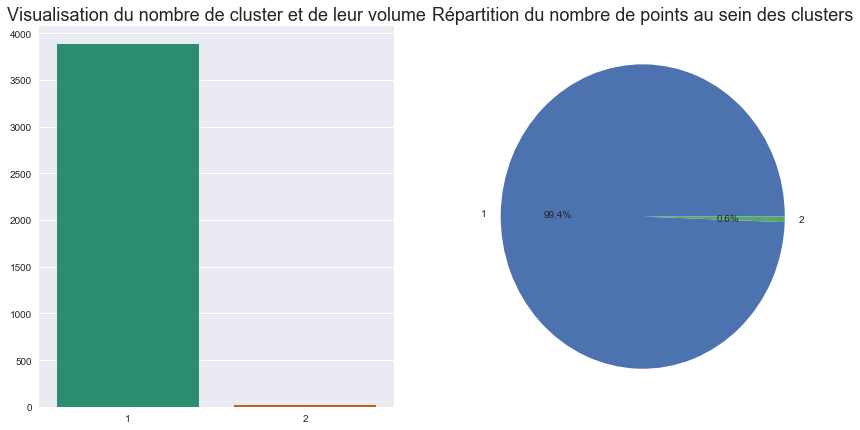

In [14]:
print(cls.cluster_centers_[0, :])
print(cls.cluster_centers_[1, :])
Cluster_Count(cls.labels_)

In [15]:
print("Silhouette Coefficient: %0.3f" %
      silhouette_score(X_data_sc, cls.labels_))

Silhouette Coefficient: 0.895


Analyse pour 3 clusters

[[-2.84373337e-02 -6.21888530e-02 -3.46553168e-02 -2.19328282e-03]
 [ 4.43576028e+00  9.24375133e+00  3.22610438e+00  3.52670758e-01]
 [-6.14026929e-01  1.00745888e+01  5.37407092e+01 -3.11218167e-01]]
Il y a  3  clusters différents


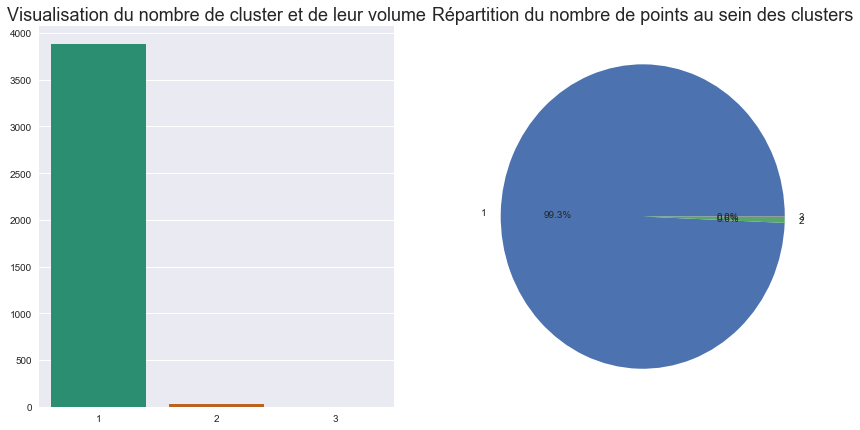

Silhouette Coefficient: 0.876


In [54]:
cls3 = KMeans(n_clusters=3)
cls3.fit(X_data_sc)
print(cls3.cluster_centers_)
Cluster_Count(cls3.labels_)
print("Silhouette Coefficient: %0.3f" %
      silhouette_score(X_data_sc, cls3.labels_))

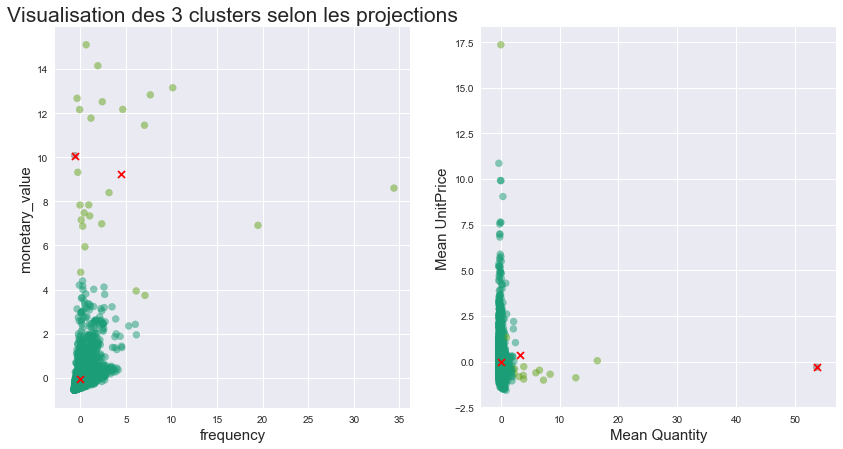

In [73]:
fig = plt.figure(figsize=(14, 7))

ax = fig.add_subplot(121)
ax.scatter(X_data_sc[:, 0], X_data_sc[:, 1],
           c=cls3.labels_, cmap="Dark2", alpha=alpha)
ax.scatter(cls3.cluster_centers_[:, 0], cls3.cluster_centers_[:, 1],
           marker='x', cmap="Dark2", c=['r'])
ax.set_xlabel('frequency', fontsize=15)
ax.set_ylabel('monetary_value', fontsize=15)
plt.title('Visualisation des 3 clusters selon les projections', fontsize=21)

ax2 = fig.add_subplot(122)
ax2.scatter(X_data_sc[:, 2], X_data_sc[:, 3],
            c=cls3.labels_, cmap="Dark2", alpha=alpha)
ax2.scatter(cls3.cluster_centers_[:, 2], cls3.cluster_centers_[:, 3],
            marker='x', cmap="Dark2", c=['r'])
ax2.set_xlabel('Mean Quantity', fontsize=15)
ax2.set_ylabel('Mean UnitPrice', fontsize=15)

plt.show()

Analyse pour 4 clusters

Il y a  4  clusters différents


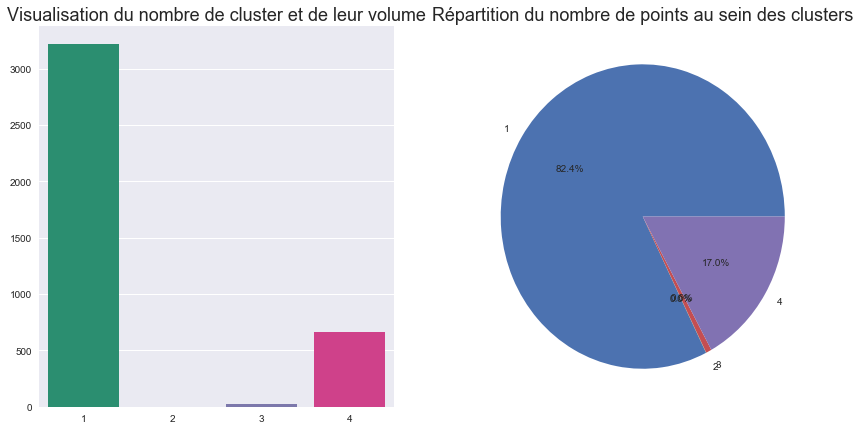

In [18]:
cls4 = KMeans(n_clusters=4)
cls4.fit(X_data_sc)
Cluster_Count(cls4.labels_)

In [19]:
print("Silhouette Coefficient: %0.3f" %
      silhouette_score(X_data_sc, cls4.labels_))

Silhouette Coefficient: 0.401


Analyse pour 5 clusters

[[-4.16634512e-01 -2.51666020e-01 -1.11766641e-01  1.82095635e+00]
 [ 4.41613901e+00  9.88538606e+00  3.61091880e+00  4.37047542e-01]
 [-2.28850151e-01 -2.28347362e-01 -2.78821534e-02 -2.66739438e-01]
 [-6.14026929e-01  1.00745888e+01  5.37407092e+01 -3.11218167e-01]
 [ 1.29762399e+00  9.29014454e-01  1.26478984e-04 -2.65265690e-01]]
Il y a  5  clusters différents


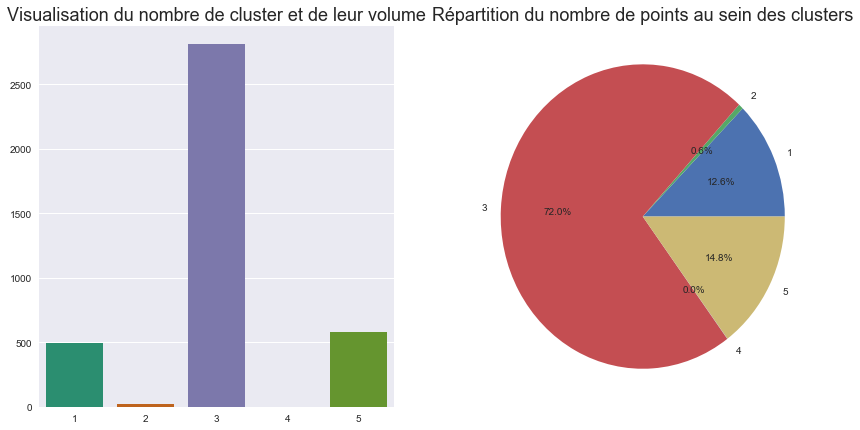

In [76]:
cls5 = KMeans(n_clusters=5)
cls5.fit(X_data_sc)
print(cls5.cluster_centers_)
Cluster_Count(cls5.labels_)

In [77]:
print("Silhouette Coefficient: %0.3f" %
      silhouette_score(X_data_sc, cls5.labels_))

Silhouette Coefficient: 0.454


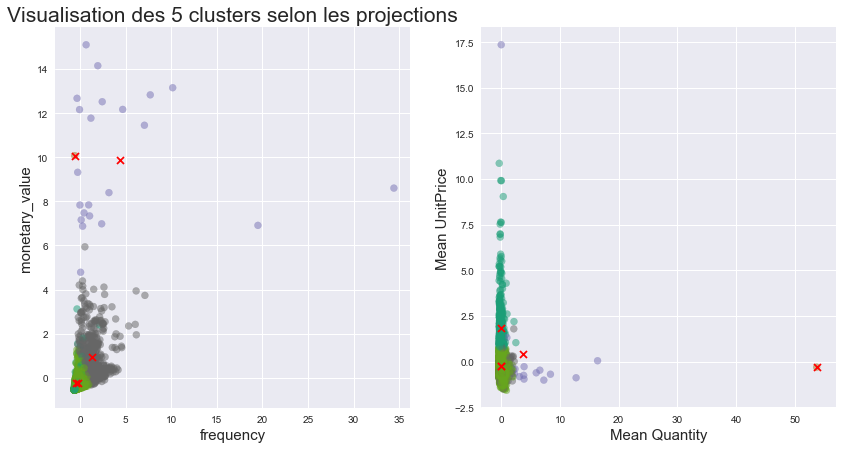

In [79]:
fig = plt.figure(figsize=(14, 7))

ax = fig.add_subplot(121)
ax.scatter(X_data_sc[:, 0], X_data_sc[:, 1],
           c=cls5.labels_, cmap="Dark2", alpha=alpha)
ax.scatter(cls5.cluster_centers_[:, 0], cls5.cluster_centers_[:, 1],
           marker='x', cmap="Dark2", c=['r'])
ax.set_xlabel('frequency', fontsize=15)
ax.set_ylabel('monetary_value', fontsize=15)
plt.title('Visualisation des 5 clusters selon les projections', fontsize=21)

ax2 = fig.add_subplot(122)
ax2.scatter(X_data_sc[:, 2], X_data_sc[:, 3],
            c=cls5.labels_, cmap="Dark2", alpha=alpha)
ax2.scatter(cls5.cluster_centers_[:, 2], cls5.cluster_centers_[:, 3],
            marker='x', cmap="Dark2", c=['r'])
ax2.set_xlabel('Mean Quantity', fontsize=15)
ax2.set_ylabel('Mean UnitPrice', fontsize=15)

plt.show()

Visualisation 

Silhouette Coefficient: 0.454


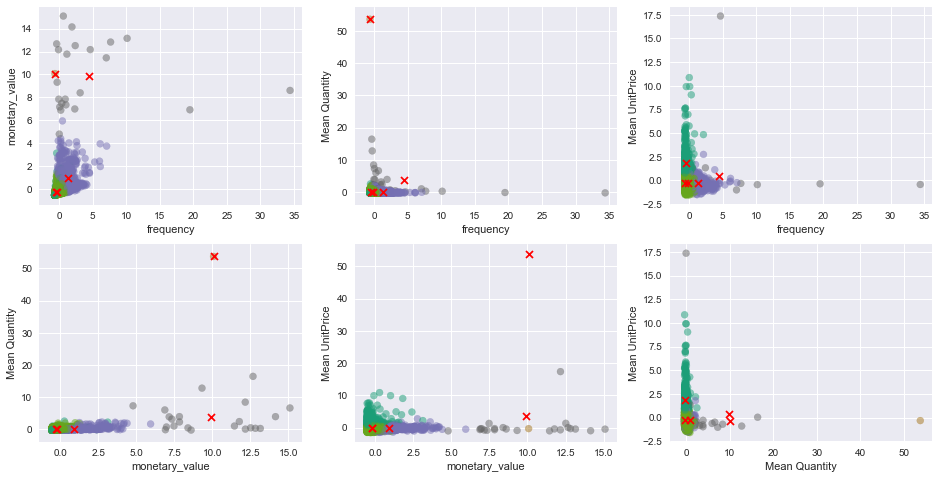

In [22]:
print("Silhouette Coefficient: %0.3f"
      % silhouette_score(X_data_sc, cls5.labels_))
fig = plt.figure(figsize=(16, 8))

ax = fig.add_subplot(231)
ax.scatter(X_data_sc[:, 0], X_data_sc[:, 1],
           c=cls5.labels_, cmap="Dark2", alpha=alpha)
ax.scatter(cls5.cluster_centers_[:, 0], cls5.cluster_centers_[:, 1],
           marker='x', cmap="Dark2", c=['r'])
ax.set_xlabel('frequency')
ax.set_ylabel('monetary_value')

ax = fig.add_subplot(232)
ax.scatter(X_data_sc[:, 0], X_data_sc[:, 2],
           c=cls5.labels_, cmap="Dark2", alpha=alpha)
ax.scatter(cls5.cluster_centers_[:, 0], cls5.cluster_centers_[:, 2],
           marker='x', cmap="Dark2", c=['r'])
ax.set_xlabel('frequency')
ax.set_ylabel('Mean Quantity')

ax = fig.add_subplot(233)
ax.scatter(X_data_sc[:, 0], X_data_sc[:, 3],
           c=cls5.labels_, cmap="Dark2", alpha=alpha)
ax.scatter(cls5.cluster_centers_[:, 0], cls5.cluster_centers_[:, 3],
           marker='x', cmap="Dark2", c=['r'])
ax.set_xlabel('frequency')
ax.set_ylabel('Mean UnitPrice')

ax = fig.add_subplot(234)
ax.scatter(X_data_sc[:, 1], X_data_sc[:, 2],
           c=cls5.labels_, cmap="Dark2", alpha=alpha)
ax.scatter(cls5.cluster_centers_[:, 1], cls5.cluster_centers_[:, 2],
           marker='x', cmap="Dark2", c=['r'])
ax.set_xlabel('monetary_value')
ax.set_ylabel('Mean Quantity')

ax = fig.add_subplot(235)
ax.scatter(X_data_sc[:, 1], X_data_sc[:, 3],
           c=cls5.labels_, cmap="Dark2", alpha=alpha)
ax.scatter(cls5.cluster_centers_[:, 1], cls5.cluster_centers_[:, 2],
           marker='x', cmap="Dark2", c=['r'])
ax.set_xlabel('monetary_value')
ax.set_ylabel('Mean UnitPrice')

ax = fig.add_subplot(236)
ax.scatter(X_data_sc[:, 2], X_data_sc[:, 3],
           c=cls5.labels_, cmap="Dark2", alpha=alpha)
ax.scatter(cls5.cluster_centers_[:, 1], cls5.cluster_centers_[:, 3],
           marker='x', cmap="Dark2", c=['r'])
ax.set_xlabel('Mean Quantity')
ax.set_ylabel('Mean UnitPrice')

plt.show()

[[-3.32288527e-01 -3.14861286e-01 -1.28091859e-02 -3.89759451e-01]
 [ 1.91971260e+00  1.49842545e+00  6.71621824e-02 -2.83881105e-01]
 [-6.14026929e-01  1.00745888e+01  5.37407092e+01 -3.11218167e-01]
 [-4.03389179e-01 -2.69078010e-01 -1.04459248e-01  1.09642912e+00]
 [ 2.69588815e+01  7.75619102e+00 -2.74955439e-01 -3.91679537e-01]
 [ 5.09923200e-01  2.97556194e-01 -4.78248521e-02 -2.62227654e-01]
 [ 2.03041329e+00  9.98936064e+00  4.21150600e+00 -3.66461732e-01]
 [-2.47942377e-01  1.94647949e-01 -1.15474592e-01  5.67057670e+00]]
Il y a  8  clusters différents


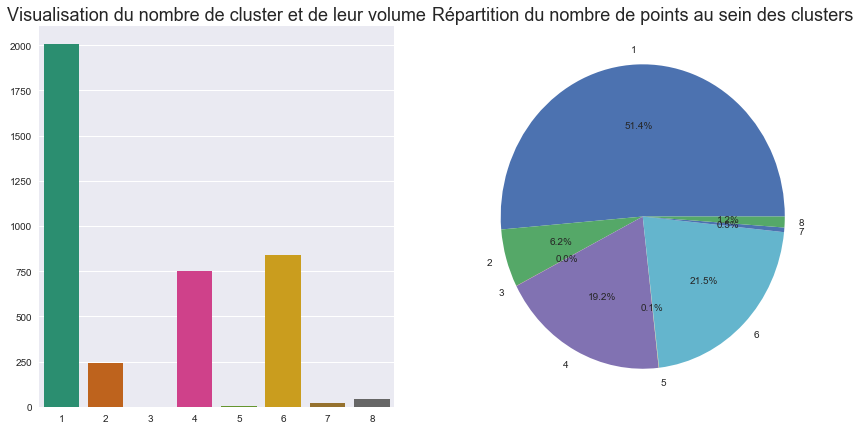

Silhouette Coefficient: 0.340


In [62]:
cls8 = KMeans(n_clusters=8)
cls8.fit(X_data_sc)
print(cls8.cluster_centers_)
Cluster_Count(cls8.labels_)
print("Silhouette Coefficient: %0.3f" %
      silhouette_score(X_data_sc, cls8.labels_))

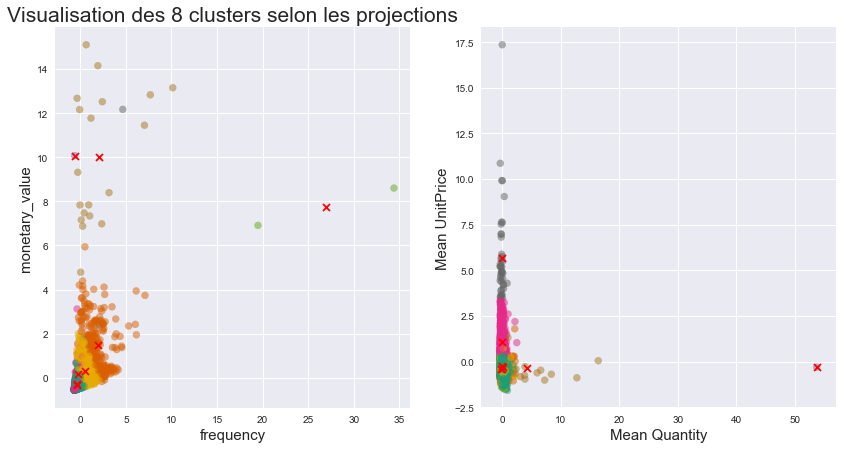

In [81]:
fig = plt.figure(figsize=(14, 7))

ax = fig.add_subplot(121)
ax.scatter(X_data_sc[:, 0], X_data_sc[:, 1],
           c=cls8.labels_, cmap="Dark2", alpha=alpha)
ax.scatter(cls8.cluster_centers_[:, 0], cls8.cluster_centers_[:, 1],
           marker='x', cmap="Dark2", c=['r'])
ax.set_xlabel('frequency', fontsize=15)
ax.set_ylabel('monetary_value', fontsize=15)
plt.title('Visualisation des 8 clusters selon les projections', fontsize=21)

ax2 = fig.add_subplot(122)
ax2.scatter(X_data_sc[:, 2], X_data_sc[:, 3],
            c=cls8.labels_, cmap="Dark2", alpha=alpha)
ax2.scatter(cls8.cluster_centers_[:, 2], cls8.cluster_centers_[:, 3],
            marker='x', cmap="Dark2", c=['r'])
ax2.set_xlabel('Mean Quantity', fontsize=15)
ax2.set_ylabel('Mean UnitPrice', fontsize=15)

plt.show()

## tSNE

In [23]:
tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=5000, init='pca')
X_tsne = tsne.fit_transform(X_data_sc)

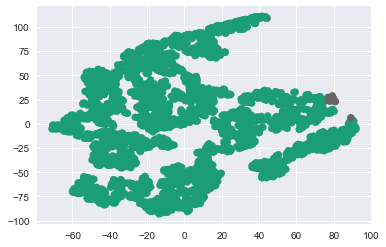

In [24]:
fig = plt.figure(figsize=(15, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cls.labels_, cmap='Dark2')
plt.show()

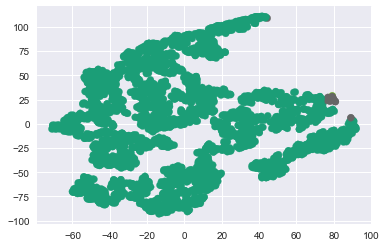

In [25]:
fig = plt.figure(figsize=(15, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cls3.labels_, cmap='Dark2')
plt.show()

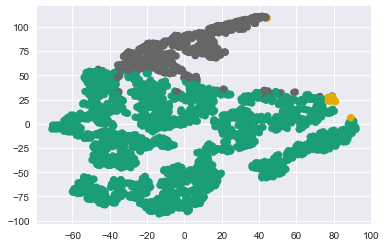

In [26]:
fig = plt.figure(figsize=(15, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cls4.labels_, cmap='Dark2')
plt.show()

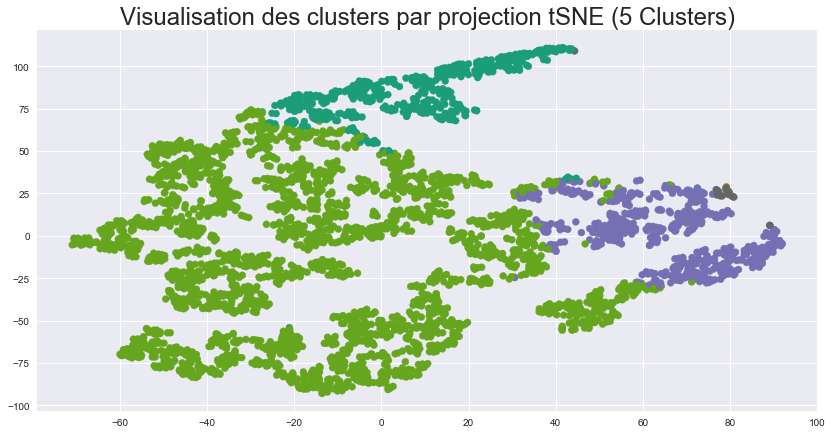

In [27]:
fig = plt.figure(figsize=(14, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cls5.labels_, cmap='Dark2')
plt.title('Visualisation des clusters par projection tSNE (5 Clusters)', fontsize = 24)
plt.show()

## DBSCAN

[ 0 -1  0 ...  0  0  0]
Il y a  2  clusters différents


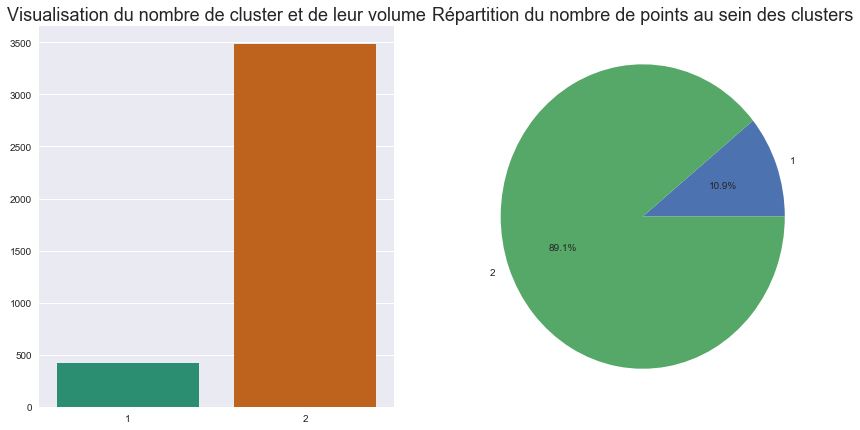

Silhouette Coefficient: 0.596


In [28]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
db = DBSCAN(eps=0.4, min_samples=30)
db.fit(X_data_sc)
print(db.labels_)
Cluster_Count(db.labels_ + 1)
print("Silhouette Coefficient: %0.3f" %
      silhouette_score(X_data_sc, db.labels_))

# Etude du jeu de données quartiles 

## Clustering hiérarchique

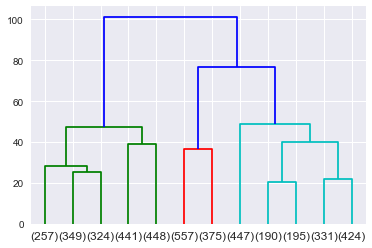

In [29]:
# Méthode de Ward
Link = linkage(X_quant_sc, 'ward')
fig = plt.figure(figsize=(15, 7))
dn = dendrogram(Link, p=12, truncate_mode='lastp')

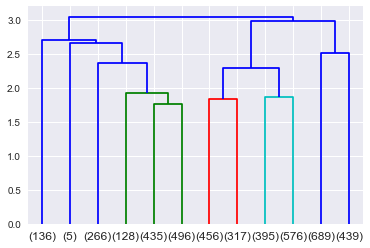

In [30]:
# Lien Moyen
Link = linkage(X_quant_sc, 'average')
fig = plt.figure(figsize=(15, 7))
dn = dendrogram(Link, p=12, truncate_mode='lastp')

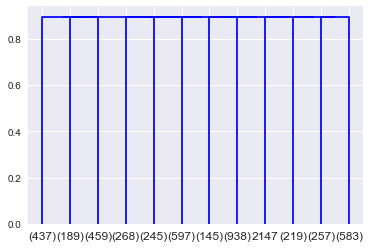

In [31]:
# Lien simple
Link = linkage(X_quant_sc, 'single')
fig = plt.figure(figsize=(15, 7))
dn = dendrogram(Link, p=12, truncate_mode='lastp')

## Agglomerative clustering

Il y a  5  clusters différents


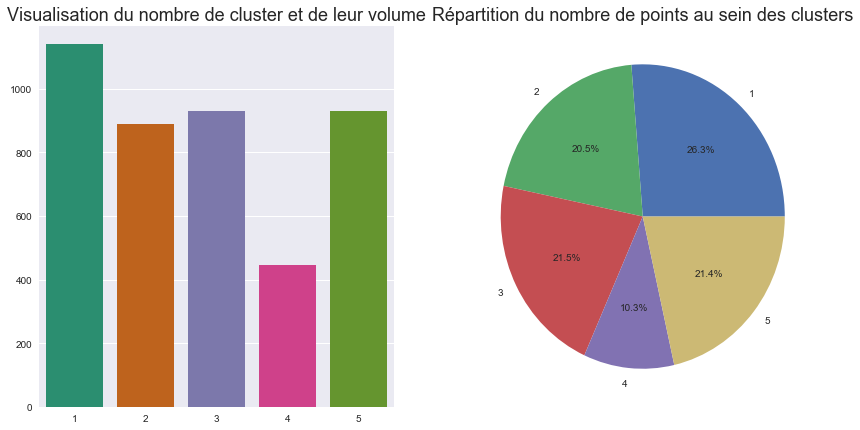

Silhouette Coefficient: 0.244


In [32]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(linkage='ward', n_clusters=5)
model.fit(X_quant_sc)
Cluster_Count(model.labels_)
print("Silhouette Coefficient: %0.3f" %
      silhouette_score(X_quant_sc, model.labels_))

# K-Means

#### Implémentation de l'algorithme Kmeans pour différentes valeurs de n_clusters, visualisation et analyse des résultats

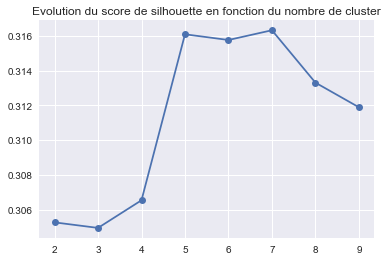

In [33]:
silhouette = []
for num_clusters in range(2, 10):
    cls = KMeans(n_clusters=num_clusters)
    cls.fit(X_quant_sc)
    silh = silhouette_score(X_quant_sc, cls.labels_)
    silhouette.append(silh)

plt.plot(range(2, 10), silhouette, marker='o')

plt.title('Evolution du score de silhouette en fonction du nombre de cluster')
plt.show()

Analyse pour deux clusters

Il y a  2  clusters différents


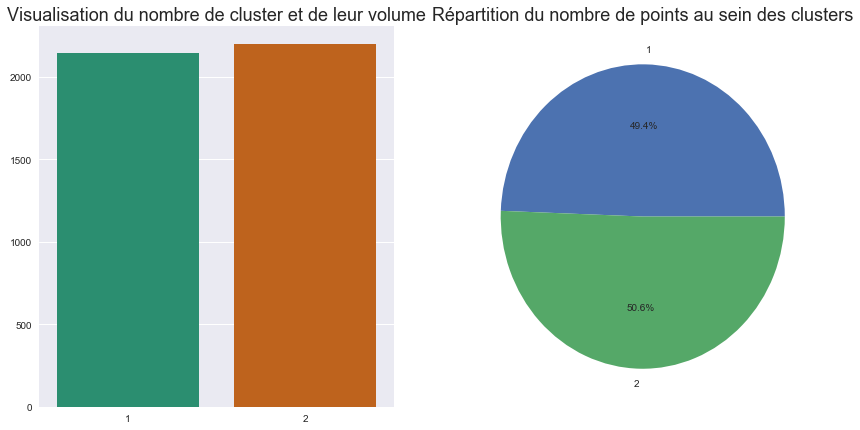

Silhouette Coefficient: 0.305


In [34]:
cls2 = KMeans(n_clusters=2)
cls2.fit(X_quant_sc)
Cluster_Count(cls2.labels_)
print("Silhouette Coefficient: %0.3f" %
      silhouette_score(X_quant_sc, cls2.labels_))

Il y a  3  clusters différents


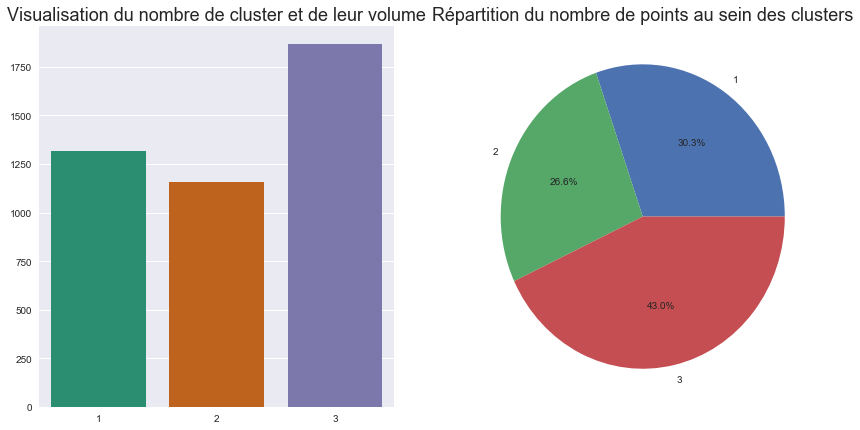

Silhouette Coefficient: 0.299


In [35]:
cls3 = KMeans(n_clusters=3)
cls3.fit(X_quant_sc)
Cluster_Count(cls3.labels_)
print("Silhouette Coefficient: %0.3f" %
      silhouette_score(X_quant_sc, cls3.labels_))

Il y a  4  clusters différents


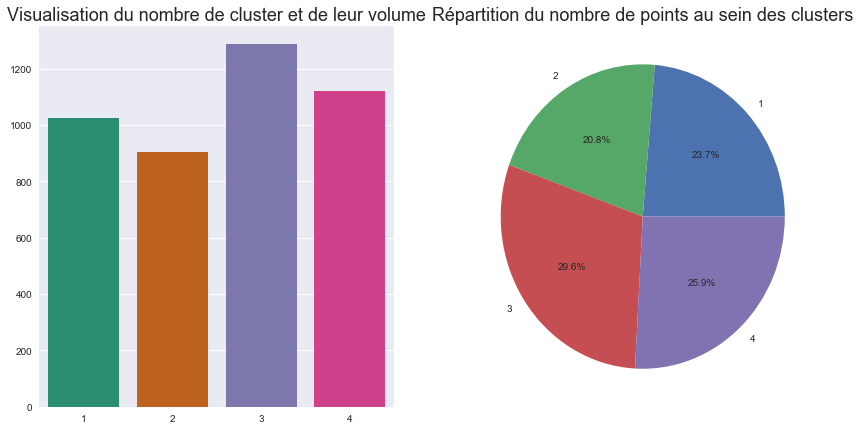

Silhouette Coefficient: 0.301


In [36]:
cls4 = KMeans(n_clusters=4)
cls4.fit(X_quant_sc)
Cluster_Count(cls4.labels_)
print("Silhouette Coefficient: %0.3f" %
      silhouette_score(X_quant_sc, cls4.labels_))

Il y a  5  clusters différents


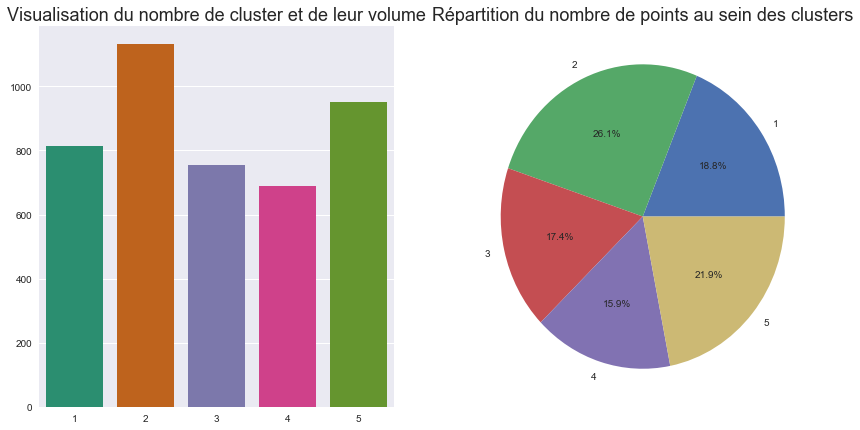

Silhouette Coefficient: 0.316


In [37]:
cls5 = KMeans(n_clusters=5)
cls5.fit(X_quant_sc)
Cluster_Count(cls5.labels_)
print("Silhouette Coefficient: %0.3f" %
      silhouette_score(X_quant_sc, cls5.labels_))

Silhouette Coefficient: 0.316


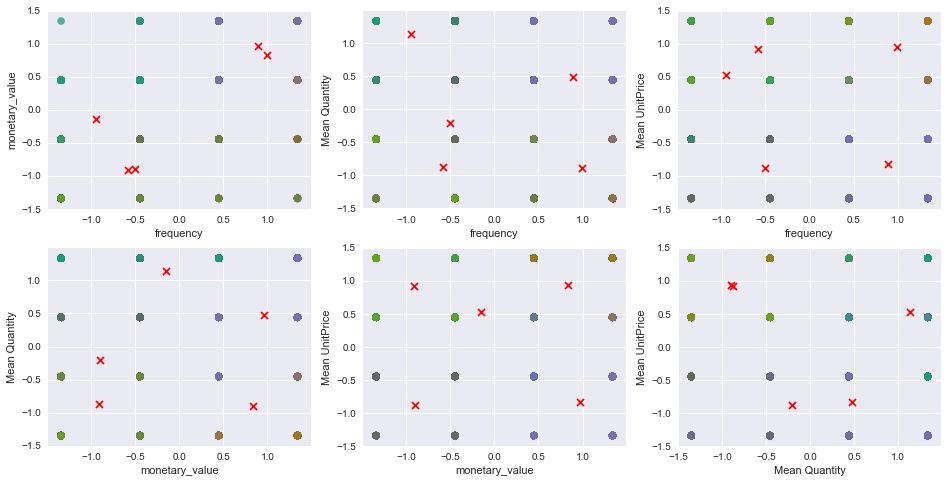

In [38]:
print("Silhouette Coefficient: %0.3f"
      % silhouette_score(X_quant_sc, cls5.labels_))
fig = plt.figure(figsize=(16, 8))

ax = fig.add_subplot(231)
ax.scatter(X_quant_sc[:, 0], X_quant_sc[:, 1],
           c=cls5.labels_, cmap="Dark2", alpha=alpha)
ax.scatter(cls5.cluster_centers_[:, 0], cls5.cluster_centers_[:, 1],
           marker='x', cmap="Dark2", c=['r'])
ax.set_xlabel('frequency')
ax.set_ylabel('monetary_value')

ax = fig.add_subplot(232)
ax.scatter(X_quant_sc[:, 0], X_quant_sc[:, 2],
           c=cls5.labels_, cmap="Dark2", alpha=alpha)
ax.scatter(cls5.cluster_centers_[:, 0], cls5.cluster_centers_[:, 2],
           marker='x', cmap="Dark2", c=['r'])
ax.set_xlabel('frequency')
ax.set_ylabel('Mean Quantity')

ax = fig.add_subplot(233)
ax.scatter(X_quant_sc[:, 0], X_quant_sc[:, 3],
           c=cls5.labels_, cmap="Dark2", alpha=alpha)
ax.scatter(cls5.cluster_centers_[:, 0], cls5.cluster_centers_[:, 3],
           marker='x', cmap="Dark2", c=['r'])
ax.set_xlabel('frequency')
ax.set_ylabel('Mean UnitPrice')

ax = fig.add_subplot(234)
ax.scatter(X_quant_sc[:, 1], X_quant_sc[:, 2],
           c=cls5.labels_, cmap="Dark2", alpha=alpha)
ax.scatter(cls5.cluster_centers_[:, 1], cls5.cluster_centers_[:, 2],
           marker='x', cmap="Dark2", c=['r'])
ax.set_xlabel('monetary_value')
ax.set_ylabel('Mean Quantity')

ax = fig.add_subplot(235)
ax.scatter(X_quant_sc[:, 1], X_quant_sc[:, 3],
           c=cls5.labels_, cmap="Dark2", alpha=alpha)
ax.scatter(cls5.cluster_centers_[:, 1], cls5.cluster_centers_[:, 3],
           marker='x', cmap="Dark2", c=['r'])
ax.set_xlabel('monetary_value')
ax.set_ylabel('Mean UnitPrice')

ax = fig.add_subplot(236)
ax.scatter(X_quant_sc[:, 2], X_quant_sc[:, 3],
           c=cls5.labels_, cmap="Dark2", alpha=alpha)
ax.scatter(cls5.cluster_centers_[:, 2], cls5.cluster_centers_[:, 3],
           marker='x', cmap="Dark2", c=['r'])
ax.set_xlabel('Mean Quantity')
ax.set_ylabel('Mean UnitPrice')

plt.show()

## DBSCAN

[-1  0 -1 ...  3 -1 -1]
Il y a  5  clusters différents


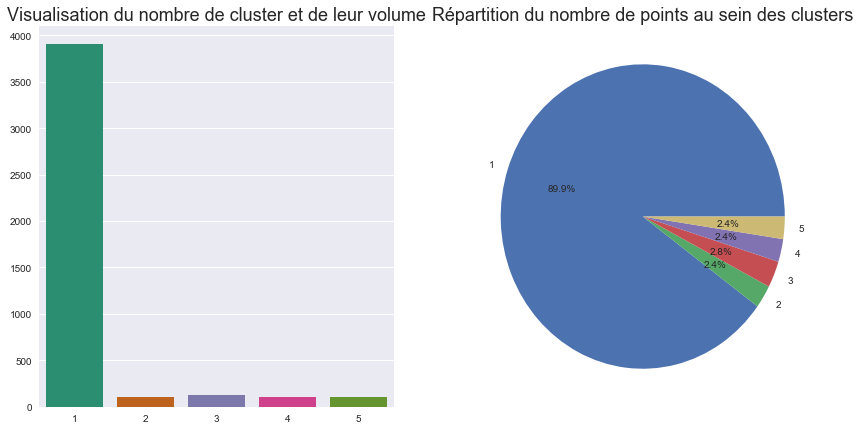

Silhouette Coefficient: -0.190


In [39]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
db = DBSCAN(eps=0.5, min_samples=100)
db.fit(X_quant_sc)
print(db.labels_)
Cluster_Count(db.labels_ + 1)
print("Silhouette Coefficient: %0.3f" %
      silhouette_score(X_quant_sc, db.labels_))

# tSNE

In [40]:
tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=5000, init='pca')
X_tsne = tsne.fit_transform(X_quant_sc)

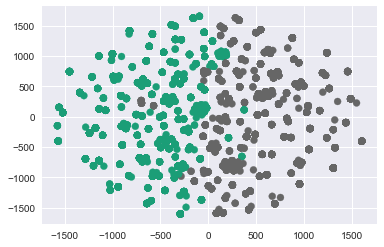

In [41]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cls2.labels_, cmap='Dark2')
plt.show()

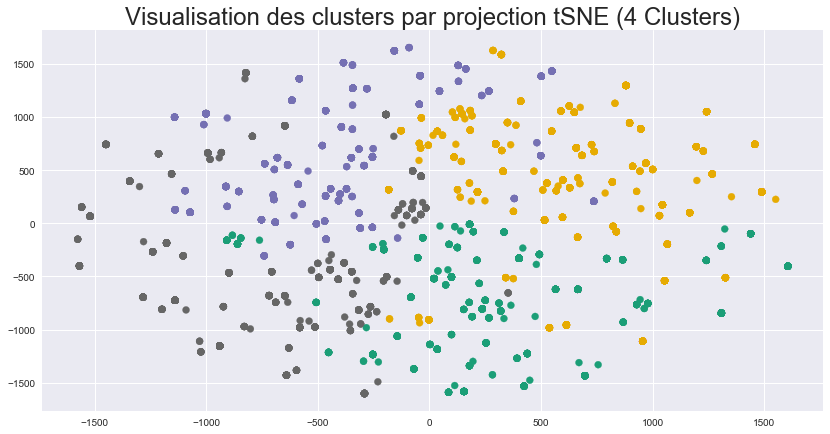

In [42]:
fig = plt.figure(figsize=(14, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cls4.labels_, cmap='Dark2')
plt.title('Visualisation des clusters par projection tSNE (4 Clusters)', fontsize = 24)
plt.show()

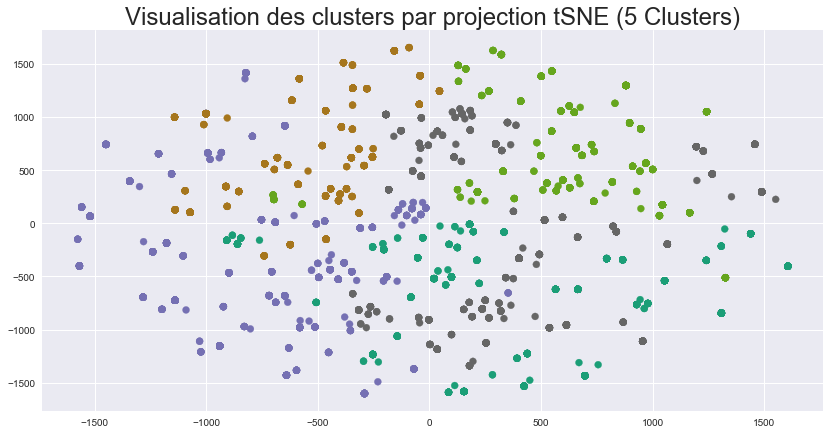

In [43]:
fig = plt.figure(figsize=(14, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cls5.labels_, cmap='Dark2')
plt.title('Visualisation des clusters par projection tSNE (5 Clusters)', fontsize = 24)
plt.show()

# Data_std

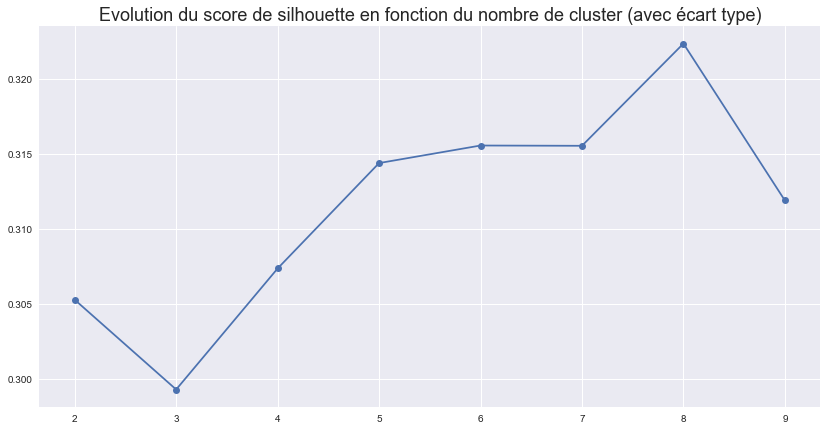

In [16]:
fig = plt.figure(figsize=(14, 7))
silhouette = []
for num_clusters in range(2, 10):
    cls = KMeans(n_clusters=num_clusters)
    cls.fit(X_std_sc)
    silh = silhouette_score(X_std_sc, cls.labels_)
    silhouette.append(silh)

plt.plot(range(2, 10), silhouette, marker='o')

plt.title('Evolution du score de silhouette en fonction du nombre de cluster (avec écart type)', fontsize=18)
plt.show()